# loaded dice example
The theory of max entropy states that the distribution that best fits the data is that distribution that has maximal entropy. This solution is always unique. Recall that the naive estimate will always yield a uniform prior which has maximal entropy. However, in the face of constraint, e.g. through data or a priori biases, one can create other distributions

The constraints are put and solved using Lagrange multipliers. 


Let's assume we have some set of observations from a dice throw and we want to find out whether the dice is loaded or not. We observa mean of 4.5, find the distribution that best fits the data.
Two constraints must be met:

\begin{aligned}
\sum_i p_i = 1 \\
\mathbb{E}[x] = \sum_i x_i p(x_i) = 4.5
\end{aligned}

We have to maximize
$$ F(p_i) = \mathbb{E}[-\log x] = - \sum_i p(x_i) \log(x_i)$$
under the constraints above:

<ipython-input-18-adda17c6e2f0>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


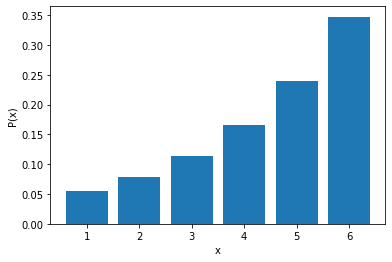

In [18]:
import numpy as np, matplotlib.pyplot as plt
from scipy import optimize

# forget minize as we want to maximize
entropy = lambda x:  (x * np.log(x)).sum()

meanTest = 4.5
# works in arbitrary dimensions
N    = 6
dice = np.arange(1, N + 1)

constraint = (\
              # expectation value
             dict(type = 'eq',\
                 fun = lambda x: dice.dot(x) - meanTest),\
              # normalization constraint
             dict(type = 'eq',\
                 fun = lambda p: p.sum() - 1))

init = np.ones(N) * 1/N
test = optimize.minimize(\
     entropy, init, constraints = constraint,\
                        )

fig, ax = plt.subplots()
ax.bar(dice, test.x)
ax.set(xlabel = 'x', \
      ylabel = 'P(x)')
fig.show()